In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import chisquare
import seaborn
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import chi2, SelectKBest, SelectFdr
from sklearn.decomposition import PCA
from rake_nltk import Rake

In [12]:
df = pd.read_csv('problems_2categories_atprobcreation.csv')
X = df.drop('Category', axis=1).values
X
le = preprocessing.LabelEncoder()
for col in range(len(X[0])):
    X[:,col] = le.fit_transform(X[:,col])
# X = df.drop('Category', axis=1)
# X = pd.get_dummies(X, columns=["'Assignment group'", "'Business service'",
#                                'Company', "'Created Time'", "'Created by'", 
#                                "'Opened by'", 'Type'])
y = df['Category'].values
y

array(['Application', 'Application', 'Application', ..., 'Hardware',
       'Hardware', 'Hardware'], dtype=object)

Adjusted_Rand: 0.0187079043115019
Silhouette: 0.4973850734956272
Total explained variance: 0.940712274316719


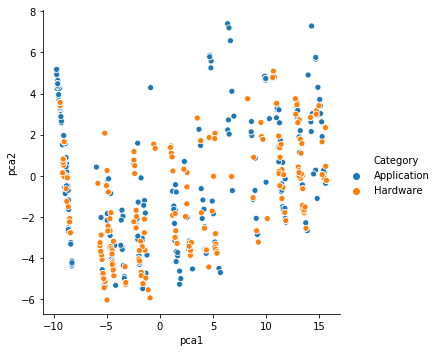

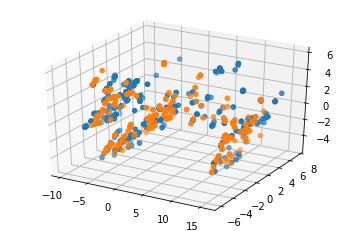

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import *
from matplotlib import pyplot
from sklearn.metrics import adjusted_rand_score, silhouette_score

pca = PCA(n_components=4)

# features = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
Xfit = pca.fit_transform(X)
df['pca1'] = Xfit[ : , 0]
df['pca2'] = Xfit[ : , 1]
df['pca3'] = Xfit[ : , 2]
df['pca4'] = Xfit[ : , 3]

model = KMeans(n_clusters=2)
model.fit(df[['pca1', 'pca2', 'pca3', 'pca4']])
print('Adjusted_Rand:', adjusted_rand_score(model.labels_, df.Category))
print('Silhouette:', silhouette_score(X, model.labels_))
print('Total explained variance:', sum(pca.explained_variance_ratio_))
seaborn.relplot(x='pca1', y='pca2', hue='Category', data = df)
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['pca1']
y = df['pca2']
z = df['pca3']


for name, group in df.groupby('Category'):
    ax.scatter(group.pca1, group.pca2, group.pca3, label=name)
    
pyplot.show()

In [6]:
print(model.labels_)

[1 0 1 ... 0 0 0]


In [9]:
df

,'Assignment group','Business service',Category,Company,'Created Time','Created by','Has Parent',Impact,'Major Problem','Opened by',Priority,Type,Urgency,pca1,pca2,pca3,pca4
0,FXO_SDESK_GLB_ProblemMgmt,Computer,Application,Other,afternoon,ID5069733,False,3,False,'Admin-Arturo Reyes',5,Standard,3,-2.269490,-0.117509,-0.305814,0.073808
1,Other,Server,Application,'FedEx Services',night,Other,True,2,True,'Nivedita Roy',4,ITCC,3,1.532381,-0.049464,0.305104,-0.272206
2,FXO_BR_US_BusinessReadiness,Computer,Application,Other,afternoon,Other,False,2,False,'Matthew Gonderinger',3,Standard,2,-0.715852,1.894260,0.977335,0.417765
3,Other,Scanner,Application,'FedEx Express',night,ID5163721,True,2,True,'Divakar Durgapal',3,ITCC,2,1.566688,1.199983,0.062017,0.866049
4,Other,Server,Application,'FedEx Services',evening,ID5305519,True,3,True,'Ashish Bisht',5,ITCC,3,1.102603,-1.132164,-0.515550,-0.770342
5,Other,Database,Application,'FedEx Express',night,ID5285658,True,3,True,'Shafi Ahmed',4,ITCC,2,1.141185,0.039522,0.183093,0.499074
6,Other,Computer,Application,'FedEx Freight Inc.',afternoon,ID973921,True,3,True,'Stephen Barch',4,ITCC,2,0.615911,0.207839,-0.659730,0.049773
7,Other,Computer,Application,Other,morning,Other,False,3,True,Other,5,ITCC,3,-0.116427,-0.914886,0.963604,-0.083307
8,FXS_SDESK_GLB_ProblemMgmt,Computer,Application,Other,afternoon,ID5069733,False,3,False,'Admin-Arturo Reyes',5,Standard,3,-2.098339,-0.172467,-0.258812,0.028975
9,Other,Other,Application,'FedEx Services',afternoon,Other,True,3,True,'Marconius Donahue',5,ITCC,3,0.644104,-1.027654,-0.040438,-0.484514
